# Introdução a Ciência de Dados
## Aula2 - Tutoria

Edesio Alcobaça <br>
email: edesio@usp.br <br>
LinkedIn: https://www.linkedin.com/in/ealcobaca/ <br>

## Exercícios

In [1]:
# biblioteca estatística
from scipy import stats

# biblioteca gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# biblioteca para manipulação de dados
import numpy as np
import pandas as pd

# seed para garantir que o experimento possa ser reproduzido
np.random.seed(42)
# define o dpi para todas as imagens
plt.rcParams['figure.dpi'] = 100

1. Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

In [2]:
# criar uma grade espaçada
# ex: 0.001
prob_heads = np.linspace(
    start=0, # valor mínimo
    stop=1, # valor máximo
    num=1000 # numero de amostras geradas
    )

In [3]:
# resolução do grid
# (stop - start) / num
(1-0)/1000

0.001

In [4]:
np.round(prob_heads[0:10], 3)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [5]:
entropy_list = []

for p in prob_heads:
  # estamos considerando a entropia de Shannon, portanto base=2 -> log2
  entropy = stats.entropy([p, 1-p], base=2)
  # adicionamos entropy na lista
  entropy_list.append(entropy)

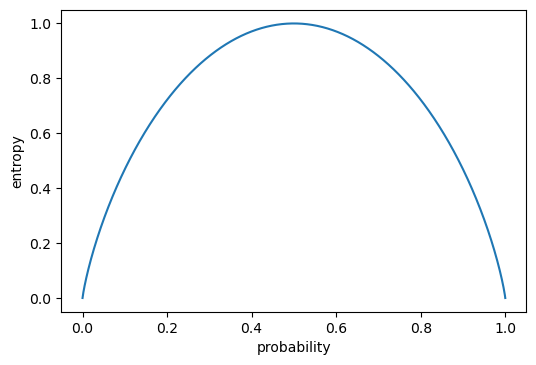

In [6]:
plt.plot(prob_heads, entropy_list)
plt.xlabel("probability")
plt.ylabel("entropy")
plt.show()

2. Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

In [7]:
# expressa a probabilidade de uma série de eventos ocorrer num certo período de
# tempo se estes eventos ocorrem independentemente de quando ocorreu o último
# evento.

# see: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_Poisson

In [8]:
x = np.random.poisson(lam=3.5, size=10000)

In [9]:
m = np.mean(x)
md = np.median(x)
var = np.var(x)
std = np.std(x)

print("Mean: ", m)
print("Median: ", md)
print("Var: ", var)
print("Std: ", std)

Mean:  3.4961
Median:  3.0
Var:  3.44498479
Std:  1.8560670219579896


In [10]:
bins = np.arange(0, 12, 1)
hist_x, _ = np.histogram(x, bins=bins)
dist_x = hist_x / np.sum(hist_x)

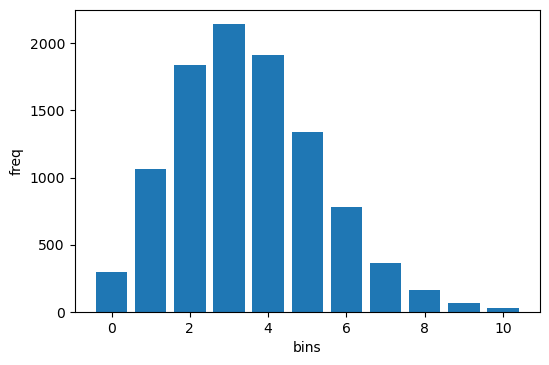

In [11]:
plt.bar(list(range(0, 11)), hist_x)
plt.xlabel("bins") 
plt.ylabel("freq") 
plt.show()

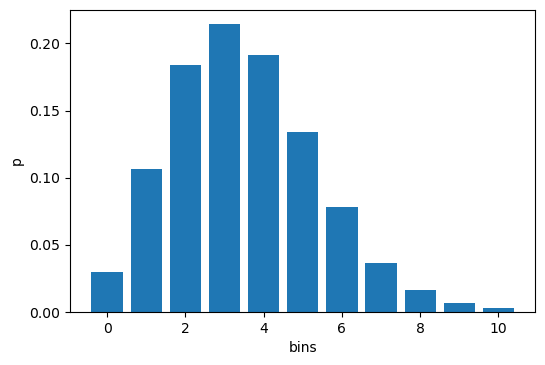

In [12]:
plt.bar(list(range(0, 11)), dist_x)
plt.xlabel("bins") 
plt.ylabel("p") 
plt.show()

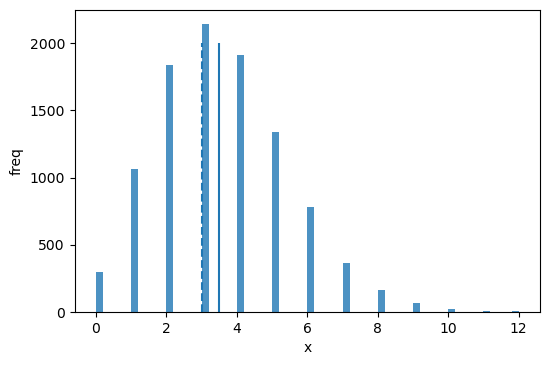

In [13]:
plt.hist(x, density=False, bins=60, alpha=0.8)

plt.vlines(m, 0, 2000)
plt.vlines(md, 0, 2000, linestyles="dashed")

plt.xlabel("x") 
plt.ylabel("freq")

plt.show()

3. Calcula e a divergência de Kullback-Leibler entre as distribuições normal e Poisson. Gerem os dados com mesma média e variância.

In [14]:
xn = np.random.normal(1, 1, size= 10000)
xp = np.random.poisson(1, size= 10000)

In [15]:
print("Normal dist")
print("Mean: ", np.mean(xn))
print("Var: ", np.var(xn))

Normal dist
Mean:  1.0091351392967667
Var:  0.9975756959387414


In [16]:
print("Poisson dist")
print("Mean: ", np.mean(xp))
print("Var: ", np.var(xp))

Poisson dist
Mean:  1.0021
Var:  0.9812955899999999


In [17]:
bins = np.linspace(np.min(xn), np.max(xn), 10)
hist_n, _ = np.histogram(xn, bins)
prob_n = hist_n / np.sum(hist_n)
print(prob_n)

hist_p, _ = np.histogram(xp, bins)
prob_p = hist_p / np.sum(hist_p)


[0.0021 0.0136 0.0732 0.2097 0.3013 0.2499 0.1205 0.0269 0.0028]


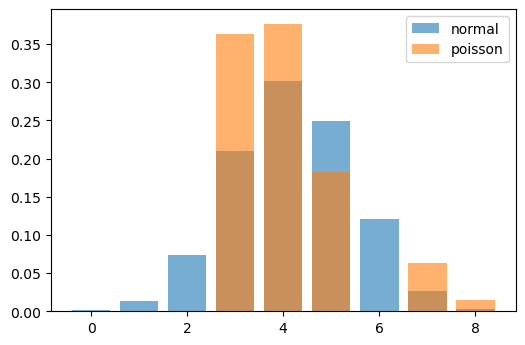

In [18]:
plt.bar(np.arange(0, len(bins)-1), prob_n, alpha = .6, label="normal")
plt.bar(np.arange(0, len(bins)-1), prob_p, alpha = .6, label="poisson")
plt.legend()
plt.show()

In [19]:
e = np.exp(1)
e

2.718281828459045

In [20]:
# informação perdida quando P é usado para aproximar o valor de N
print('KL(N, P) = ', stats.entropy(prob_n, prob_p, base=e))
# informação perdida quando N é usado para aproximar o valor de Q
print('KL(P, N) = ', stats.entropy(prob_p, prob_n, base=e))

KL(N, P) =  inf
KL(P, N) =  0.30450024535972264


4. Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

In [21]:
# expressa a probabilidade discreta do número de sucessos numa sequência de
# n tentativas ...
# veja mais: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_binomial

In [22]:
n = 100
p = 0.01

xp = np.random.poisson(n*p, size= 10000)
xb = np.random.binomial(n, p, size=10000)
# produto do n*p
# 100*0.01

In [23]:
print("Normal binomial")
print("Mean: ", np.mean(xp))
print("Var: ", np.var(xp))

Normal binomial
Mean:  0.9992
Var:  0.9857993599999998


In [24]:
print("Binomial dist")
print("Mean: ", np.mean(xb))
print("Var: ", np.var(xb))

Binomial dist
Mean:  0.9913
Var:  0.96002431


In [25]:
bins = np.arange(0, 8, 1)

hist_b, _ = np.histogram(xb, bins)
prob_b = hist_b / np.sum(hist_b)

hist_p, _ = np.histogram(xp, bins)
prob_p = hist_p / np.sum(hist_p)

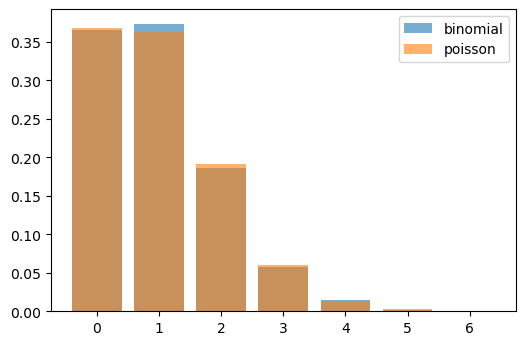

In [26]:
plt.bar(np.arange(0, len(bins) -1), prob_b, alpha = .6, label="binomial")
plt.bar(np.arange(0, len(bins) -1), prob_p, alpha = .6, label="poisson")
plt.legend()
plt.show()

In [27]:
e = np.exp(1)
e

2.718281828459045

In [28]:
print('KL(N, P) = ', stats.entropy(prob_b, prob_p, base=e))
print('KL(P, N) = ', stats.entropy(prob_p, prob_b, base=e))

KL(N, P) =  0.00042513691725517785
KL(P, N) =  0.000434526592671637


5. Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

> Indented block



In [29]:
intervalo = [0.01, 100]

x = np.linspace(intervalo[0], intervalo[1], 1000)
y = np.log(x)

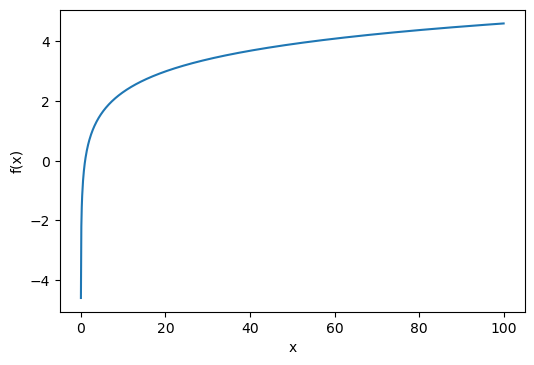

In [30]:
plt.plot(x, y)
plt.xlabel("x") 
plt.ylabel("f(x)") 
plt.show()

In [31]:
corr_p, _ = stats.pearsonr(x, y)

In [32]:
round(corr_p, 2)

0.86

In [33]:
corr_s, _ = stats.spearmanr(x, y)

In [34]:
round(corr_s, 2)

1.0

## Extra

In [37]:
data = pd.read_csv("base_dados/iris.csv", header=0) # lê os dados a partir do arquivo


In [38]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


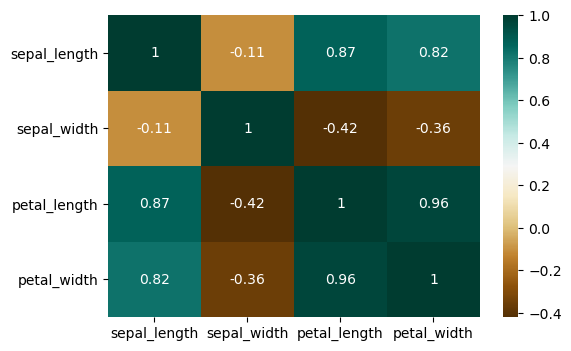

In [40]:
sns.heatmap(data.corr(method="pearson"), annot=True, cmap='BrBG')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

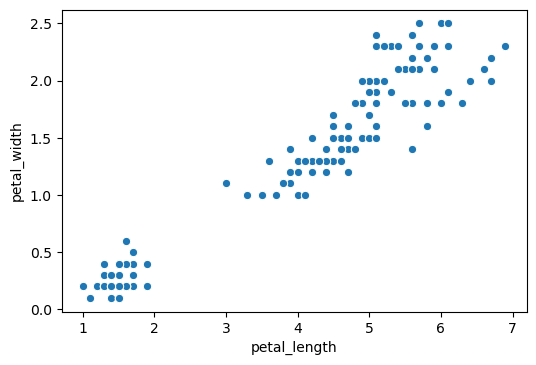

In [41]:
sns.scatterplot(data=data, x="petal_length", y="petal_width")

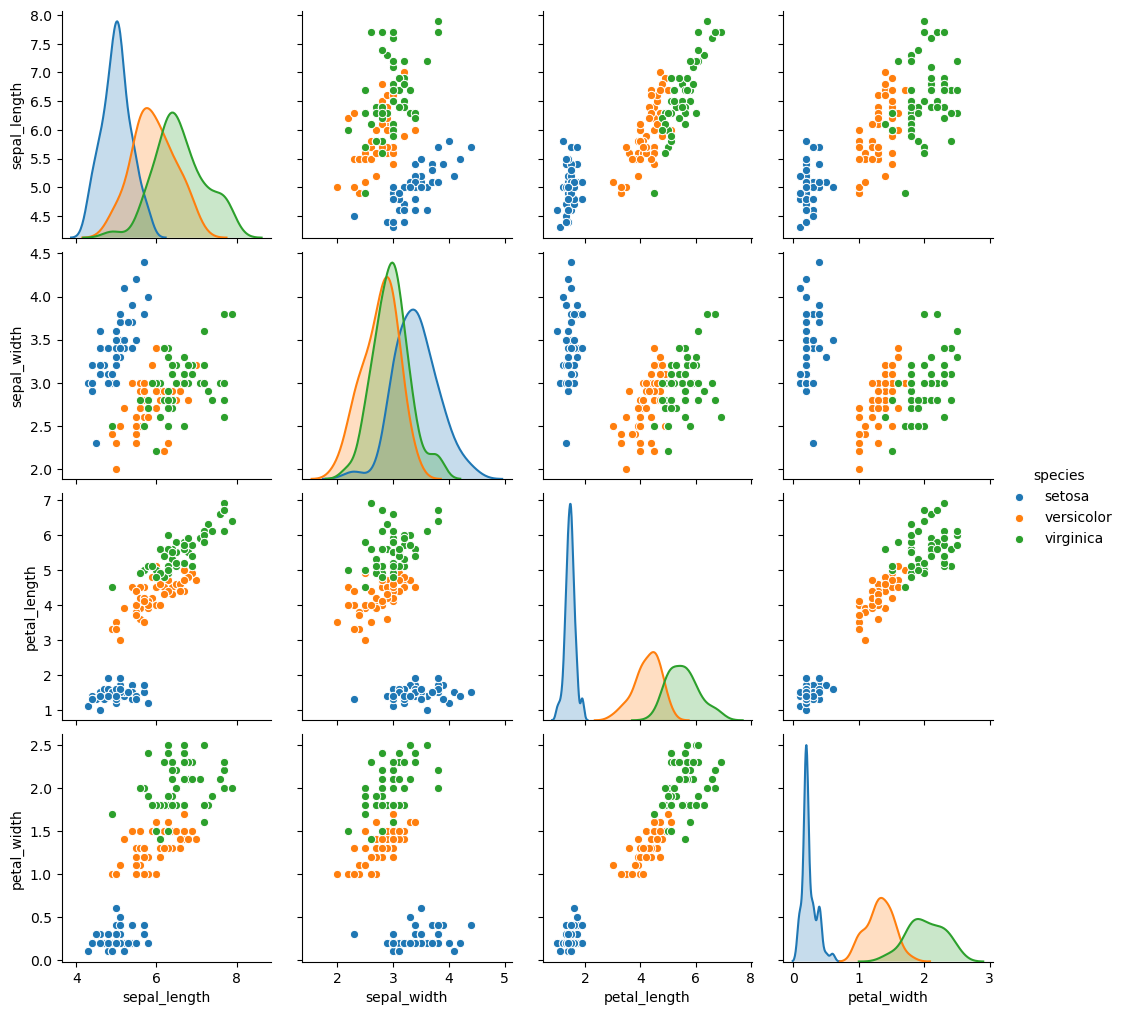

In [42]:
sns.pairplot(data, hue="species")